In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#fANOVA install

!git clone https://github.com/automl/fanova.git
%cd /content/fanova
!pip install -r requirements.txt
!python setup.py install

Cloning into 'fanova'...
remote: Enumerating objects: 1602, done.
remote: Total 1602 (delta 0), reused 0 (delta 0), pack-reused 1602
Receiving objects: 100% (1602/1602), 28.84 MiB | 36.06 MiB/s, done.
Resolving deltas: 100% (873/873), done.
/content/fanova
     |████████████████████████████████| 4.0MB 31.3MB/s 
     |████████████████████████████████| 4.2MB 33.4MB/s 
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:484: UserWarning: Normalizing '2.0.20.dev' to '2.0.20.dev0'
  warnings.warn(tmpl.format(**locals()))
running install
running bdist_egg
running egg_info
creating fanova.egg-info
writing fanova.egg-info/PKG-INFO
writing dependency_links to fanova.egg-info/dependency_links.txt
writing requirements to fanova.egg-info/requires.txt
writing top-level names to fanova.egg-info/top_level.txt
writing manifest file 'fanova.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'fanova.egg-info/SOURCES.txt'
installing library code to build/bdist.linux

In [ ]:
#Reading xlsx file as dataframe

df = pd.DataFrame(pd.read_excel('/content/fanova_wszystkie_nawetniewiemjakiexd.xlsx'))
df.drop('trial_id',inplace = True, axis = 1)
df.head(5)


,learning_rate,dropout,n_unfreeze_layers,img_size,batch_size,optimizer,val_accuracy
0,0.004317,0.294967,132,256,32,Adadelta,0.938765
1,0.000291,0.115528,118,256,16,SGD,0.999705
2,0.000085,0.337158,123,256,64,Adadelta,0.103413
3,0.005083,0.183349,118,128,16,RMSprop,0.978579
4,0.002913,0.365710,118,256,16,Adadelta,1.000000


In [ ]:
#Converting dataframe to csv (Fanova uses csv files) 

df.to_csv ("/content/anova.csv", 
                  index = None,
                  header=True)

In [ ]:
#Label encoding for anova (it cannot take string argument) and some other formatting operations
df = pd.read_csv('/content/anova.csv')
#print(df)
df['optimizer'] = df['optimizer'].astype('category')
df['optimizer_cat'] = df['optimizer'].cat.codes
df.drop('optimizer',inplace = True, axis = 1)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['optimizer_cat','learning_rate','dropout','n_unfreeze_layers','img_size','batch_size','val_accuracy']] = scaler.fit_transform(df[['optimizer_cat','learning_rate','dropout','n_unfreeze_layers','img_size','batch_size','val_accuracy']])
'''
print(df.head(5))
#data = np.loadtxt('/content/df_data.csv',delimiter='.')
#df_data = df.to_csv(r'/content/fanova_data_all.csv',index=False,header = False )

fanova_y = df.val_accuracy
fanova_x = df.drop(['val_accuracy'],axis = 1 )

print(fanova_x.head(5))
print(fanova_y.head(5))
fanova_x.to_csv(r'/content/fanova_x.csv',index=False,header = False )
fanova_y.to_csv(r'/content/fanova_y.csv',index=False,header = False )

from fanova import fANOVA
import csv
X = np.loadtxt('/content/fanova_x.csv',delimiter=',')
Y = np.loadtxt('/content/fanova_y.csv',delimiter=',')

import ConfigSpace
from ConfigSpace.hyperparameters import UniformFloatHyperparameter

# config space
pcs = list(zip(np.min(X,axis=0), np.max(X, axis=0)))
cs = ConfigSpace.ConfigurationSpace()
for i in range(len(pcs)):
	cs.add_hyperparameter(UniformFloatHyperparameter("%i" %i, pcs[i][0], pcs[i][1]))
 
print(cs)
f = fANOVA(X,Y,config_space=cs, min_samples_split =3)


print((f.quantify_importance((0, ))))
print(f.quantify_importance((1, )))
print(f.quantify_importance((2, )))
print(f.quantify_importance((3, )))
print(f.quantify_importance((4, )))
print(f.quantify_importance((5, )))

   optimizer_cat  learning_rate   dropout  ...  img_size  batch_size  val_accuracy
0              0       0.004317  0.294967  ...       256          32      0.938765
1              3       0.000291  0.115528  ...       256          16      0.999705
2              0       0.000085  0.337158  ...       256          64      0.103413
3              2       0.005083  0.183349  ...       128          16      0.978579
4              0       0.002913  0.365710  ...       256          16      1.000000

[5 rows x 7 columns]
   optimizer_cat  learning_rate  ...  img_size  batch_size
0              0       0.004317  ...       256          32
1              3       0.000291  ...       256          16
2              0       0.000085  ...       256          64
3              2       0.005083  ...       128          16
4              0       0.002913  ...       256          16

[5 rows x 6 columns]
0    0.938765
1    0.999705
2    0.103413
3    0.978579
4    1.000000
Name: val_accuracy, dtype: float64

In [ ]:
import fanova.visualizer
vis = fanova.visualizer.Visualizer(f, cs,'/content/')

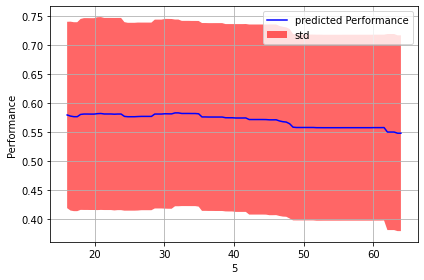

In [ ]:
vis.plot_marginal(5)

In [ ]:
best_margs = f.get_most_important_pairwise_marginals(n=10)
print(best_margs)

OrderedDict([(('0', '1'), 0.060746769909165305), (('0', '2'), 0.05284951149242754), (('1', '2'), 0.042618701864101764), (('1', '3'), 0.035564005139555), (('2', '3'), 0.02541993210091143), (('1', '4'), 0.023577672652094765), (('0', '3'), 0.0220011452580803), (('2', '4'), 0.018654271915198525), (('3', '4'), 0.015984760630863536), (('0', '4'), 0.008844263536998919)])


INFO:fanova.visualizer.Visualizer:creating /content/interactive_plots


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

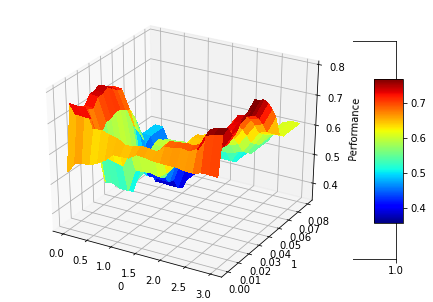

In [ ]:
vis.plot_pairwise_marginal((0,1), resolution=20)

In [ ]:
import numpy as np

from fanova import fANOVA
import fanova.visualizer

import ConfigSpace
from ConfigSpace.hyperparameters import UniformFloatHyperparameter

import os
#path = os.path.dirname(os.path.realpath(__file__))

# directory in which you can find all plots
plot_dir = '/content/test_plots'

# artificial dataset (here: features)
features = np.loadtxt('/content/diabetes_features.csv', delimiter=",")
responses = np.loadtxt('/content/diabetes_responses.csv', delimiter=",")

# config space
pcs = list(zip(np.min(features,axis=0), np.max(features, axis=0)))
cs = ConfigSpace.ConfigurationSpace()
for i in range(len(pcs)):
	cs.add_hyperparameter(UniformFloatHyperparameter("%i" %i, pcs[i][0], pcs[i][1]))


# create an instance of fanova with trained forest and ConfigSpace
f = fANOVA(X = features, Y = responses, config_space=cs)

# marginal of particular parameter:
dims = (1, )
res = f.quantify_importance(dims)
print(res)

# getting the 10 most important pairwise marginals sorted by importance
best_margs = f.get_most_important_pairwise_marginals(n=10)
print(best_margs)

# visualizations:
# first create an instance of the visualizer with fanova object and configspace
vis = fanova.visualizer.Visualizer(f, cs, '/content/')
# creating the plot of pairwise marginal:
vis.plot_pairwise_marginal((0,2), resolution=20)
# creating all plots in the directory
vis.create_all_plots(plot_dir)

OSError: ignored